# Notebook to start overviewing the data from ECG channel

## Import libraries

In [1]:
import os
import mne
import matplotlib.pyplot as plt
import neurokit2 as nk
import pandas as pd

%matplotlib widget

# Part 1: Data Loading

## Load ECG Signal from Parquet

In [2]:
# Constants
sampling_rate = 1000
data_folder = './rest_data'

# Load single subject data for exploration
data = pd.read_parquet(os.path.join(data_folder, 'sub-032_task-rest_ecg_rest.parquet'))
ecg_signal = data['ECG']

print(f"✅ Data loaded successfully")
print(f"   Shape: {data.shape}")
print(f"   Columns: {list(data.columns)}")

✅ Data loaded successfully
   Shape: (227081, 3)
   Columns: ['time', 'PPG', 'ECG']


# Part 2: Analysis & Metrics Extraction

## Process ECG Signal

Clean the signal and extract R-peaks for wave delineation

In [3]:
# Process the ECG signal
signals, info = nk.ecg_process(data['ECG'], sampling_rate=sampling_rate)

print(f"✅ ECG processing complete")
print(f"   Signals shape: {signals.shape}")
print(f"   Available metrics: {list(info.keys())}")

✅ ECG processing complete
   Signals shape: (227081, 19)
   Available metrics: ['method_peaks', 'method_fixpeaks', 'ECG_R_Peaks', 'ECG_R_Peaks_Uncorrected', 'ECG_fixpeaks_ectopic', 'ECG_fixpeaks_missed', 'ECG_fixpeaks_extra', 'ECG_fixpeaks_longshort', 'ECG_fixpeaks_method', 'ECG_fixpeaks_rr', 'ECG_fixpeaks_drrs', 'ECG_fixpeaks_mrrs', 'ECG_fixpeaks_s12', 'ECG_fixpeaks_s22', 'ECG_fixpeaks_c1', 'ECG_fixpeaks_c2', 'sampling_rate', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets']


In [4]:
# Extract R-peaks and clean signal for delineation
rpeaks = info['ECG_R_Peaks']
clean = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)

print(f"✅ R-peaks extracted and signal cleaned")
print(f"   Number of R-peaks: {len(rpeaks)}")
print(f"   Clean signal shape: {clean.shape}")

✅ R-peaks extracted and signal cleaned
   Number of R-peaks: 306
   Clean signal shape: (227081,)


✅ Wave delineation complete
   P-waves: 306
   Q-waves: 306
   S-waves: 306
   T-waves: 306


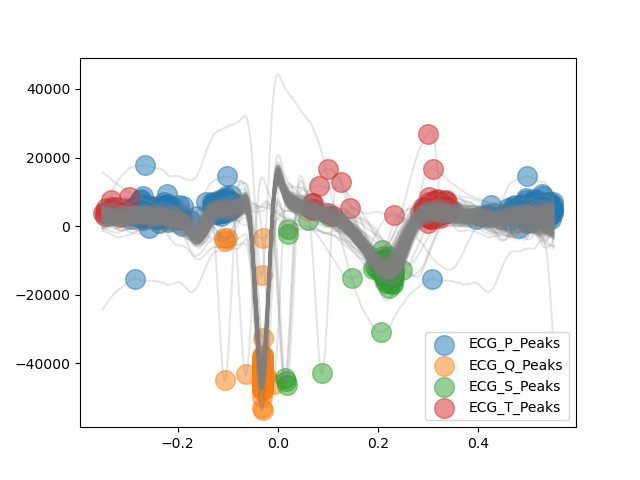

In [5]:
# Perform wave delineation to identify P, QRS, and T waves
signals_delineate, waves = nk.ecg_delineate(clean, rpeaks=rpeaks, sampling_rate=sampling_rate, method="dwt", show=True)

print(f"✅ Wave delineation complete")
print(f"   P-waves: {len(waves['ECG_P_Peaks'])}")
print(f"   Q-waves: {len(waves['ECG_Q_Peaks'])}")
print(f"   S-waves: {len(waves['ECG_S_Peaks'])}")
print(f"   T-waves: {len(waves['ECG_T_Peaks'])}")

## Calculate Heart Rate Variability (HRV)

Compute time, frequency, and non-linear domain HRV indices

✅ HRV analysis complete
   Computed 91 HRV indices


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,741.570492,68.272354,18.412395,66.351952,NaN,NaN,NaN,NaN,50.985711,51.067603,...,1.293878,7.168335,1.056541,1.359464,1.250382,1.910414,1.652023,1.831503,2.400347,0.811738


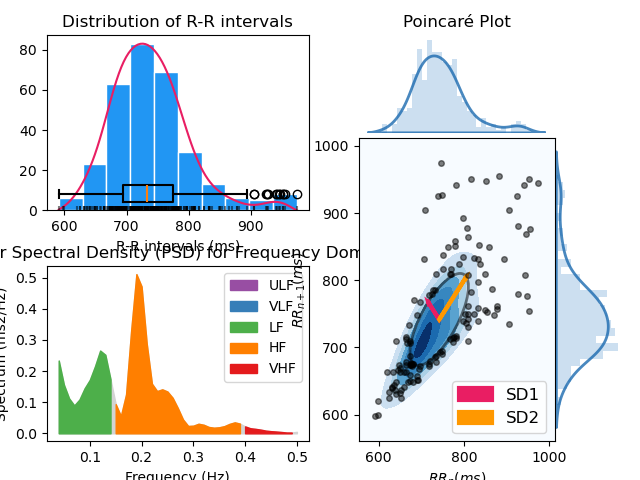

In [6]:
# Calculate HRV metrics (Time, Frequency, and Non-Linear domains)
hrv_indices = nk.hrv(info, sampling_rate=sampling_rate, show=True)

print(f"✅ HRV analysis complete")
print(f"   Computed {len(hrv_indices.columns)} HRV indices")
display(hrv_indices)

# Part 3: Visualization & Results

## ECG Signal with Delineated Waves

Visualize processed ECG with P, QRS, and T waves identified

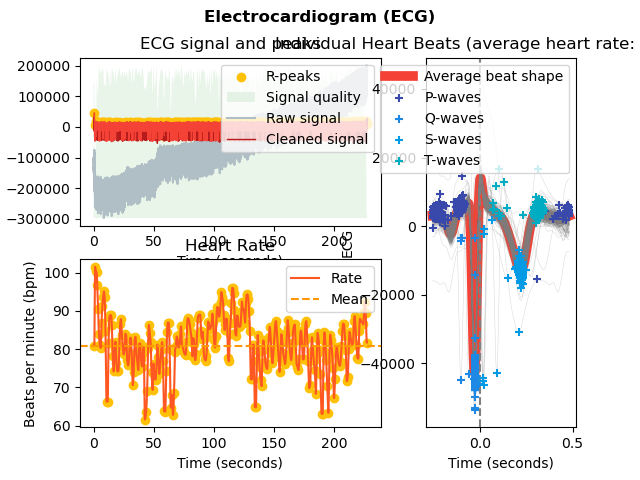

In [9]:
# Display comprehensive ECG processing visualization
nk.ecg_plot(signals, info)

## Summary Statistics

Key metrics and diagnostic information

In [8]:
# Display comprehensive summary of analysis
print("\n" + "="*70)
print("📊 ECG ANALYSIS SUMMARY")
print("="*70)

print(f"\n📈 Recording Details:")
print(f"   Duration: {len(ecg_signal)/sampling_rate:.2f} seconds")
print(f"   Sampling Rate: {sampling_rate} Hz")
print(f"   Total Samples: {len(ecg_signal):,}")

print(f"\n❤️  Heart Rate Analysis:")
print(f"   R-peaks Detected: {len(info['ECG_R_Peaks'])}")
print(f"   Average HR: {signals['ECG_Rate'].mean():.1f} bpm")
print(f"   HR Min: {signals['ECG_Rate'].min():.1f} bpm")
print(f"   HR Max: {signals['ECG_Rate'].max():.1f} bpm")

print(f"\n🌊 Wave Delineation:")
print(f"   P-waves: {len(info['ECG_P_Peaks'])} detected")
print(f"   Q-waves: {len(info['ECG_Q_Peaks'])} detected")
print(f"   S-waves: {len(info['ECG_S_Peaks'])} detected")
print(f"   T-waves: {len(info['ECG_T_Peaks'])} detected")

print(f"\n📋 HRV Indices Calculated:")
print(f"   Total: {len(hrv_indices.columns)} indices")
print(f"\n   Top HRV Metrics:")
for col in list(hrv_indices.columns)[:5]:
    print(f"   - {col}: {hrv_indices[col].values[0]:.4f}")

print("\n" + "="*70)


📊 ECG ANALYSIS SUMMARY

📈 Recording Details:
   Duration: 227.08 seconds
   Sampling Rate: 1000 Hz
   Total Samples: 227,081

❤️  Heart Rate Analysis:
   R-peaks Detected: 306
   Average HR: 81.0 bpm
   HR Min: 61.6 bpm
   HR Max: 101.5 bpm

🌊 Wave Delineation:
   P-waves: 306 detected
   Q-waves: 306 detected
   S-waves: 306 detected
   T-waves: 306 detected

📋 HRV Indices Calculated:
   Total: 91 indices

   Top HRV Metrics:
   - HRV_MeanNN: 741.5705
   - HRV_SDNN: 68.2724
   - HRV_SDANN1: 18.4124
   - HRV_SDNNI1: 66.3520
   - HRV_SDANN2: nan

